Ejemplo de una curva ROC para un modelo predictivo

In [49]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

In [2]:
#Generar un dataset con 2 clases
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1) #random_state: semilla que garantiza que siempre de los mismos resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [3]:
#Fit del modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
y_pred = model.predict_proba(X_test)

In [7]:
y_pred_pos = y_pred[:,1]

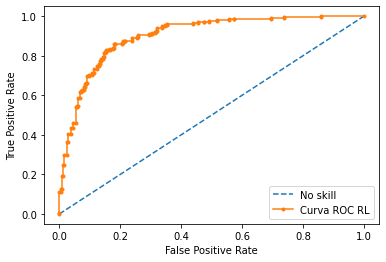

In [8]:
#Plot no-skill curva ROC
plt.plot([0 , 1], [0 , 1], linestyle='--', label='No skill')
#Calcular curva ROC para el modelo
fpr, tpr, _ = roc_curve(y_test, y_pred_pos)
#Plot curva ROC del modelo
plt.plot(fpr, tpr, marker='.', label='Curva ROC RL')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [39]:
#Generar un dataset con 2 clases y desbalance importante
X_nobal, y_nobal = make_classification(n_samples=1000, n_classes=2, weights=[0.80, 0.20], random_state=1)
X_nobal1, y_nobal1 = make_classification(n_samples=1000, n_classes=2, weights=[0.20, 0.80], random_state=1)
#Dividir entre TRAIN y TEST con alguna relación de clases (usando stratify)
X_train_nobal, X_test_nobal, y_train_nobal, y_test_nobal = train_test_split(X_nobal, y_nobal, test_size=0.5, random_state=2, stratify=y_nobal)
X_train_nobal1, X_test_nobal1, y_train_nobal1, y_test_nobal1 = train_test_split(X_nobal1, y_nobal1, test_size=0.5, random_state=2, stratify=y_nobal)

In [34]:
print(f'Dataset:   Clase 0: {len(y_nobal[y_nobal==0])}  Clase 1: {len(y_nobal[y_nobal==1])}')
print(f'Train:     Clase 0: {len(y_train_nobal[y_train_nobal==0])}  Clase 1: {len(y_train_nobal[y_train_nobal==1])}')
print(f'Test:      Clase 0: {len(y_test_nobal[y_test_nobal==0])}  Clase 1: {len(y_test_nobal[y_test_nobal==1])}')

Dataset:   Clase 0: 795  Clase 1: 205
Train:     Clase 0: 397  Clase 1: 103
Test:      Clase 0: 398  Clase 1: 102


In [40]:
#Fit del modelo
model_1 = LogisticRegression(solver='lbfgs')
model_1.fit(X_train_nobal, y_train_nobal)

model_2 = LogisticRegression(solver='lbfgs')
model_2.fit(X_train_nobal1, y_train_nobal1)

LogisticRegression()

In [41]:
y_pred_1 = model_1.predict_proba(X_test_nobal)
y_pred_2 = model_1.predict_proba(X_test_nobal1)

In [42]:
y_pred_pos_1 = y_pred_1[:,1]
y_pred_pos_2 = y_pred_2[:,1]

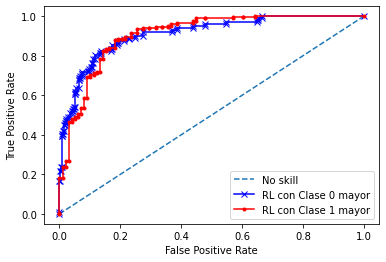

In [47]:
#Plot no-skill curva ROC
plt.plot([0 , 1], [0 , 1], linestyle='--', label='No skill')
#Calcular curva ROC para el modelo
fpr1, tpr1, thr1 = roc_curve(y_test_nobal, y_pred_pos_1)
fpr2, tpr2, thr2 = roc_curve(y_test_nobal1, y_pred_pos_2)
#Plot curva ROC del modelo
plt.plot(fpr1, tpr1, marker='x', label='RL con Clase 0 mayor', c='b')
plt.plot(fpr2, tpr2, marker='.', label='RL con Clase 1 mayor', c='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()